# Medical MNIST
 
**Autori:** Erik Matovič a Simon Kokavec   
**Dataset:** https://www.kaggle.com/andrewmvd/medical-mnist [1]   
**Percentuálny podiel:** 50/50  
## Exploratory Data Analysis

### Výber obrázkov pre zobrazenie

 - v tejto časti sme sa inšpirovali týmto [zdrojom](https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2)
 - najprv získame všetky priečinky, v ktorých máme naše obrázkové dáta:  

In [1]:
import os

data_dir = '../data/' # image folder

data_folders = [name for name in os.listdir(data_dir) if os.path.isdir(data_dir + name)]
data_folders

['Hand', 'AbdomenCT', 'HeadCT', 'train', 'BreastMRI', 'ChestCT', 'CXR', 'test']

 - pozrieme sa vybrané 3 obrázky z každého priečinka a spočítame celkový počet našich obrázkových dát - máme 58954 obrázkov; zároveň najmenej dát máme z BreastMRI, jediný priečinok pod 10 tisíc obrázkov
 - zároveň sme zistili, že farebný model obrázka je tvorený 8 bitmi v čiernobielom(tzv. grayscale) farebnom modeli(označené ako L v inštancii PIL image)
 - všetky vybraté obrázky majú rovnakú šírku a výšku a to 100 pixelov
 - zároveň sme vypísali aj potrebné informácie o obrázkoch
 - z náhodného prezretia obrázkov vidíme, že niektoré obrázky su menej kvalitné

Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


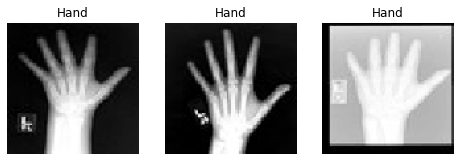

../data/Hand has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


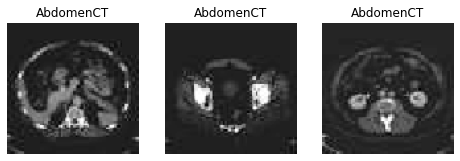

../data/AbdomenCT has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


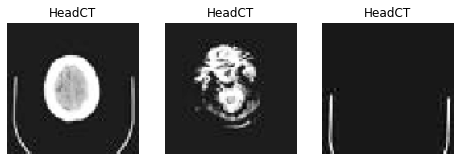

../data/HeadCT has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


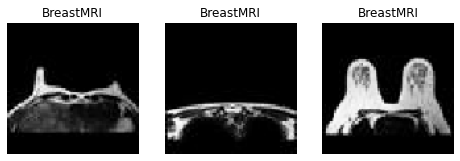

../data/BreastMRI has 8954 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


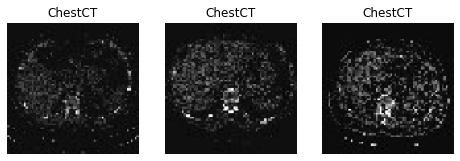

../data/ChestCT has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


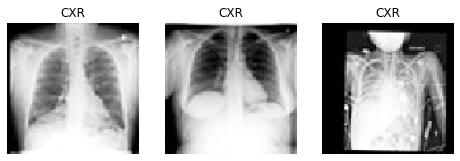

../data/CXR has 10000 files
We have 58954 images in total


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

all_data = 0 # counter
classes = dict()

# get data from each folder
for folder in data_folders:
    # skip train and test folders
    if (folder == "train" or folder == "test"):
        continue
    
    # get the list of jpegs from sub image class folders
    imgs = [fn for fn in os.listdir(data_dir + folder) if fn.endswith('.jpeg')]

    # randomly select 3 images from folder
    random_select = np.random.choice(imgs, 3, replace = False)
    
    # plotting 1 x 3 image matrix
    fig = plt.figure(figsize = (8,6))
    for i in range(3):
        fp = data_dir + folder + '/' + random_select[i]
        ax = fig.add_subplot(1, 3, i+1)

        # to plot without rescaling, remove target_size
        fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
        print("Image's color model is:", fn.mode)
        print("Image's size is(width, height):", fn.size)
        print("Image's info:", fn.info)
        plt.imshow(fn, cmap='Greys_r')
        plt.title(folder)
        plt.axis('off')
    plt.show()

    # also check the number of files here
    all_data += len(imgs)
    classes[folder] = len(imgs)
    print(f'{data_dir + folder} has {len(imgs)} files')

print(f'We have {all_data} images in total')

### Počet dát po jednotlivých triedach

 - v tejto časti sme graficky znázornili počet dát/obrázkov v našich triedach; triedy Hand, AbdomenCT, HradCT, ChestCT a CXR majú rovnaký počet obrázkov a to desať tisíc a jediná trieda, BreastMRI, má menej obrázkov a to 8954, dokopy máme 58954 obrázkov ako náš dataset

<AxesSubplot:>

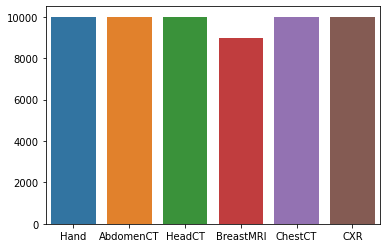

In [3]:
import seaborn as sns

keys = list(classes.keys())

no_img = [classes[key] for key in keys] # get number of images in the same order as keys
sns.barplot(x=keys, y=no_img)

### Rozdelenie datasetu na trénovaciu a testovaciu množinu  
- je dôležité si rozdeliť náš dataset na trénovací a testovací ešte pred tým než začneme vytvárať náš model

In [4]:
import shutil
import os
import numpy as np

for folder in data_folders:
    # skip train and test folders
    if (folder == "train" or folder == "test"):
        continue
        
    # if directory exist, skip
    if (os.path.isdir(data_dir +'train/' + folder)):
        continue
        
    # otherwise create one
    os.makedirs(data_dir +'train/' + folder)
    os.makedirs(data_dir +'test/' + folder)
    source_dir = data_dir + folder
    allFileNames = os.listdir(source_dir)
    np.random.shuffle(allFileNames)
    
    # 20% nasich dat bude testovacich
    test_ratio = 0.20

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])
    
    train_FileNames = [source_dir + '/' + name for name in train_FileNames.tolist()]
    test_FileNames = [source_dir + '/' + name for name in test_FileNames.tolist()]
    
    for name in train_FileNames:
      shutil.copy(name, data_dir +'train/' + folder)
    for name in test_FileNames:
      shutil.copy(name, data_dir +'test/' + folder)
print('Done!')

Done!


 - rozdelili sme to v miere 80% dát ako trénovacích a 20% dát ako testovacích
 - zistili sme ďalšie údaje v rámci prieskumnej analýzy údajov:
     - obrázky sú v rozsahu 64x64
     - 47163 obrázkov predstavuje 80% nášho datasetu, čo je v rámci trénovania, v testovaní je zvyšných 20% z nášho datasetu
     - máme 6 tried v klasifikácií: Hand, AbdomenCT, HeadCT, BreastMRI, ChestCT, CXR

In [5]:
from PIL import Image

# set path for dataset
train_dir = '../data/train/'           

# get class names, equal as data_folders upper
class_names = os.listdir(train_dir)  

# get a number of classes, which is a number of subdirectories
no_classes = len(class_names)        

# get list of images' filenames based on classes
#list has lenght of no_classes and each index have imgs of a class
images_classes = list(range(no_classes))
for i in range(0, no_classes, 1):
    images_classes[i] = list()
    for x in os.listdir(os.path.join(train_dir,class_names[i])):
        images_classes[i].append(os.path.join(train_dir,class_names[i],x))
        
# get number og images of each class
no_imgs_class = list()#[len(images_classes[folder]) for folder in range(0, no_classes, 1)]     
for folder in range(0, no_classes, 1):
    no_imgs_class.append(len(images_classes[folder]))
    
# get list of filenames
imgs_files = list()           

# get the labels or the type of each individual img in the list
img_class = list()              

# set variables of img_class & imgs_files
for folder in range(0, no_classes, 1):
    imgs_files.extend(images_classes[folder])
    img_class.extend([folder]*no_imgs_class[folder])

# get total number of images
numTotal = len(img_class)   

# get the dimensions
img_width, img_height = Image.open(imgs_files[0]).size         

print("There are", numTotal, "images in", no_classes, "classes")
print("Label names:", class_names)
print("Label counts:", no_imgs_class)
print("Image dimensions:", img_width, "x", img_height)


There are 47163 images in 6 classes
Label names: ['Hand', 'AbdomenCT', 'HeadCT', 'BreastMRI', 'ChestCT', 'CXR']
Label counts: [8000, 8000, 8000, 7163, 8000, 8000]
Image dimensions: 64 x 64


 - triedy Hand, AbdomenCT, HradCT, ChestCT a CXR majú rovnaký počet obrázkov a to osem tisíc a jediná trieda, BreastMRI, má menej obrázkov a to niečo cez sedem tisíc, dokopy máme 47163 obrázkov ako našu trénovaciu množinu

<AxesSubplot:>

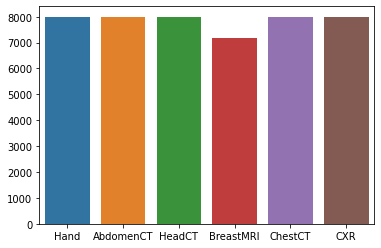

In [6]:
sns.barplot(x=class_names, y=no_imgs_class)

### Návrh modelu

 - vzhľadom na 6 tried a na medicínske obrázky sme sa rozhodli navrhnúť model klasifikátora na základe konvolučnej neurónovej siete, ktorá sa používa na klasifikovanie alebo segmentovanie obrazových dát

## Model

 - pre implementáciu modelu sme sa rozhodli použiť modul PyTorch s využitím CUDA architektúry pre paralelizáciu výpočtov na GPU, v prípade ak na stroji nie je grafická karta podporujúca CUDA architektúru, tak výpočty prebehnú na CPU, čo je avšak pomalšie

In [7]:
import numpy as np
import os
import time
%matplotlib inline
import matplotlib.pyplot as mp
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as om
import torchvision as tv
import torch.utils.data as dat

# run PyTorch on CUDA architecture
if torch.cuda.is_available():     
    dev = torch.device("cuda:0")
    kwar = {'num_workers': 8, 'pin_memory': True}
    cpu = torch.device("cpu")
else:
    print("Warning: CUDA not found, CPU only.")
    dev = torch.device("cpu")
    kwar = {}
    cpu = torch.device("cpu")

#np.random.seed(551)
print(dev, kwar, cpu)

cuda:0 {'num_workers': 8, 'pin_memory': True} cpu


 - pre správne extrahovanie informácií z pixelov kvoli grayscale farebnému modelu zvýšime kontrast, a preto preškálujeme obrázky na hodnoty pixelov od 0 po 1
 - zároveň je dôležité konvertovať obrázky typu JPEG na dátový typ tensors

In [8]:
toTensor = tv.transforms.ToTensor()

# Load, scale, and stack image tensor
tensors = list()
for img_path in imgs_files:
    PIL_img = Image.open(img_path)
    # from PIL image, get a tensor
    tensor_img = toTensor(PIL_img)
    
    # the image isn't empty, rescale its values to run from 0 to 1
    if(tensor_img.min() < tensor_img.max()):  
        tensor_img = (tensor_img - tensor_img.min()) / (tensor_img.max() - tensor_img.min()) 
    
    # append list of tensors
    tensors.append(tensor_img)
    
# stack image (X) tensor
img_tensor = torch.stack(tensors) 
    
# Create label (Y) tensor
class_tensor = torch.tensor(img_class)  

# Get look at rescaled values
print(f'Min pixel value: {img_tensor.min().item()} and max pixel value: {img_tensor.max().item()}')



Min pixel value: 0.0 and max pixel value: 1.0


## Bibliography

[1] Medical MNIST Classification, apolanco3225, 2017, GitHub, GitHub repository, https://github.com/apolanco3225/Medical-MNIST-Classification